# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# TME 2Y - Histogrammes

<div class="alert alert-block alert-warning">
Nous allons reprendre dans ce TME les données du TME 1 sur la géolocalisation de points d'intérêt dans Paris et l'isolation faite dans le TME précédent en séparant dans des variables `bars`,`restos` et `barestos`  les lieux correspondants respectivement à des bars seul, des restaurants seul et des bars-restaurants, qui ont une note existante.
</div>

<div class="alert alert-block alert-info">
Tout d'abord, exécuter le bloc ci-dessous pour importer les bibliothèques Pandas, MatPlotLib et Numpy.
</div>

In [79]:
# Chargement des bibliothèque pandas, matplotlib et numpy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1 - Simulation et histogrammes

<div class="alert alert-block alert-warning">
Afin de mieux comprendre l'estimation par histogramme (et les pièges possibles), nous allons étudier dans un premier temps des données simulés. La fonction <code>np.random.uniform(size = N)</code> permet de tirer uniformément dans $[0,1[$ un échantillon de taille <code>N</code>.
</div>

<div class="alert alert-block alert-info">
    Q1.1 - Tirer un échantillon <code>ech50</code> de taille 50 et faire un histogramme des valeurs obtenues en utilisant 2, 5, 10 et 20 segments.
</div>

(array([4., 1., 2., 1., 1., 2., 1., 1., 2., 5., 4., 2., 1., 4., 3., 3., 2.,
        6., 2., 3.]),
 array([0.00403482, 0.05351072, 0.10298661, 0.1524625 , 0.2019384 ,
        0.25141429, 0.30089019, 0.35036608, 0.39984197, 0.44931787,
        0.49879376, 0.54826965, 0.59774555, 0.64722144, 0.69669733,
        0.74617323, 0.79564912, 0.84512502, 0.89460091, 0.9440768 ,
        0.9935527 ]),
 <BarContainer object of 20 artists>)

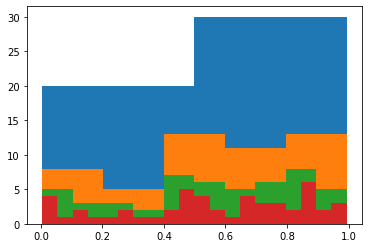

In [80]:
ech50 = np.random.uniform(size = 50)
plt.hist(ech50, bins = 2)
plt.hist(ech50, bins = 5)
plt.hist(ech50, bins = 10)
plt.hist(ech50, bins = 20)

<div class="alert alert-block alert-info">
Q1.2 - Tirer un échantillon <code>ech100</code> de taille 100 et faire un histogramme des valeurs obtenues en utilisant 2, 5, 10 et 20 segments.
</div>

(array([ 6.,  4.,  9.,  7.,  4.,  4.,  2.,  1.,  4.,  6.,  5.,  4.,  4.,
         7.,  4., 11.,  7.,  4.,  4.,  3.]),
 array([0.02272975, 0.07133287, 0.119936  , 0.16853913, 0.21714226,
        0.26574538, 0.31434851, 0.36295164, 0.41155477, 0.46015789,
        0.50876102, 0.55736415, 0.60596728, 0.6545704 , 0.70317353,
        0.75177666, 0.80037979, 0.84898291, 0.89758604, 0.94618917,
        0.9947923 ]),
 <BarContainer object of 20 artists>)

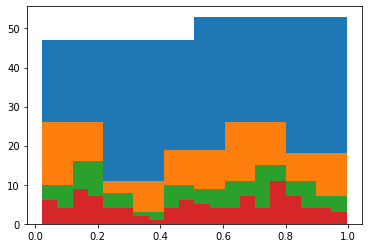

In [81]:
ech100 = np.random.uniform(size = 100)
plt.hist(ech100, bins = 2)
plt.hist(ech100, bins = 5)
plt.hist(ech100, bins = 10)
plt.hist(ech100, bins = 20)

<div class="alert alert-block alert-info">
Q1.3 - Tirer un échantillon <code>ech1000</code> de taille 1000 et faire un histogramme des valeurs obtenues en utilisant 2, 5, 10 et 20 segments.
</div>

(array([53., 48., 55., 52., 47., 51., 46., 53., 51., 39., 45., 44., 53.,
        48., 38., 52., 59., 51., 58., 57.]),
 array([6.96581237e-04, 5.05434740e-02, 1.00390367e-01, 1.50237259e-01,
        2.00084152e-01, 2.49931045e-01, 2.99777938e-01, 3.49624830e-01,
        3.99471723e-01, 4.49318616e-01, 4.99165508e-01, 5.49012401e-01,
        5.98859294e-01, 6.48706187e-01, 6.98553079e-01, 7.48399972e-01,
        7.98246865e-01, 8.48093757e-01, 8.97940650e-01, 9.47787543e-01,
        9.97634436e-01]),
 <BarContainer object of 20 artists>)

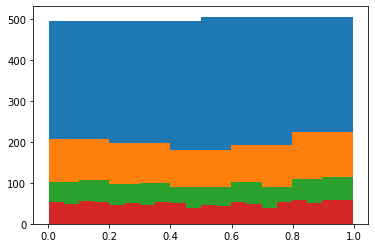

In [82]:
ech1000 = np.random.uniform(size = 1000)
plt.hist(ech1000, bins = 2)
plt.hist(ech1000, bins = 5)
plt.hist(ech1000, bins = 10)
plt.hist(ech1000, bins = 20)

<div class="alert alert-block alert-info">
Q1.4 - Comparer les trois résultats. Quel est le nombre de segments optimaux pour $N=50$ ? Pour $N=1000$ ? Comment évolue ce nombre en fonction de la taille de l'échantillon ?
</div>

In [83]:
#Le nombre de segments optimal pour N=50  est de 5 et pour N = 1000 est de 10. Plus La taille de l'échantillon augmente, plus le nombre de segements optimal augmente. 

# 2 - Histogramme 2D

<div class="alert alert-block alert-warning">
On peut généraliser les histogrammes à des dimensions supérieures, en particulier dans le cas de dimension 2. 
    La fonction <code>plt.hist2D(dataX, dataY, bins = N)</code> permet de construire l'histogramme  des points en 2 dimensions dont la liste des abscisses est passée dans <code>dataX</code> et la liste des ordonnées dans <code>dataY</code>. Vous pouvez connaître l'échelle des couleurs en rajoutant juste après l'instruction <code>plt.colorbar()</code>.
La fonction retourne 4 valeurs : le tableau du nombre d'échantillons dans chaque case, les bornes des cases des abscisses, les bornes des cases des ordonnées, et la figure.
</div>

<div class="alert alert-block alert-info">
    Q2.1 - En utilisant toujours <code>np.random.uniform()</code>, tirer un échantillon de 50 points 2D  en stockant les abscisses dans <code>echX50</code> et les ordonnées dans <code>echY50</code>. Faire les histogrammes 2D avec 2, 5, 10 et 50 segments par axe. Répéter l'expérience avec $100$ puis $1000$ points. 

Que remarquez vous dans ce cas 2D sur le rapport entre taille de l'échantillon et nombre de segments ? À votre avis, que se passe-t-il lorsqu'on augment encore la dimension ?
</div>

In [84]:
echX50 = np.random.uniform (size = 50)
echY50 = np.random.uniform ( size = 50)

##### <div class="alert alert-block alert-info">
    Q2.2 - Faire les histogrammes 2D avec 2, 5, 10 et 50 segments par axe.
</div>

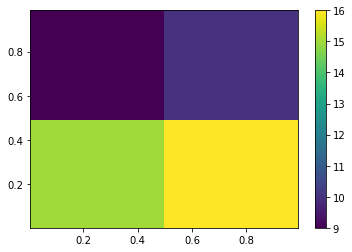

In [85]:
plt.hist2d(echX50, echY50, bins = 2)
plt.colorbar()

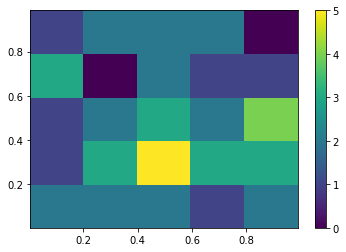

In [86]:
plt.hist2d(echX50, echY50, bins = 5)
plt.colorbar()

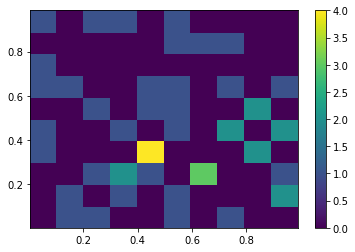

In [87]:
plt.hist2d(echX50, echY50, bins = 10)
plt.colorbar()

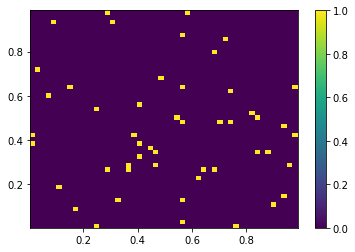

In [88]:
plt.hist2d(echX50, echY50, bins = 50)
plt.colorbar()

<div class="alert alert-block alert-info">
    Q2.3 - Répéter l'expérience avec $100$ puis $1000$ points. 

Que remarquez vous dans ce cas 2D sur le rapport entre taille de l'échantillon et nombre de segments ? À votre avis, que se passe-t-il lorsqu'on augment encore la dimension ?
</div>

In [89]:
echX100 = np.random.uniform (size = 100)
echY100 = np.random.uniform ( size = 100)
echX1000 = np.random.uniform (size = 1000)
echY1000 = np.random.uniform ( size = 1000)

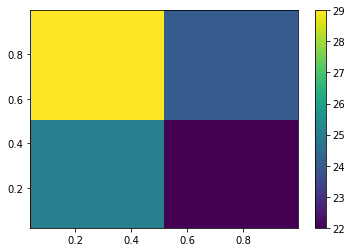

In [90]:
plt.hist2d(echX100, ech100, bins = 2)
plt.colorbar()

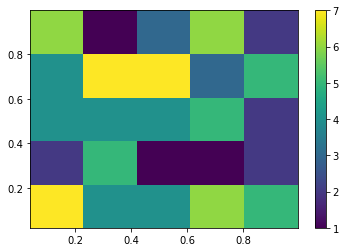

In [91]:
plt.hist2d(echX100, ech100, bins = 5)
plt.colorbar()

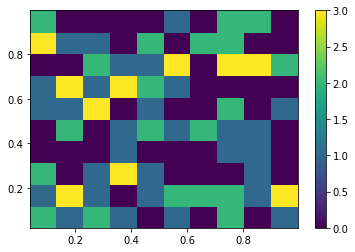

In [92]:
plt.hist2d(echX100, ech100, bins = 10)
plt.colorbar()

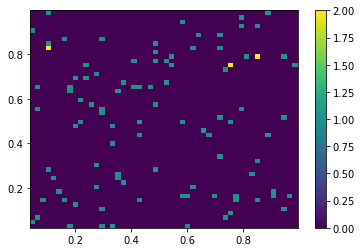

In [93]:
plt.hist2d(echX100, ech100, bins = 50)
plt.colorbar()

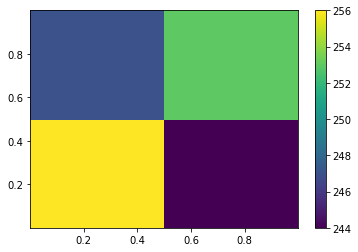

In [94]:
plt.hist2d(echX1000, echY1000, bins = 2)
plt.colorbar()

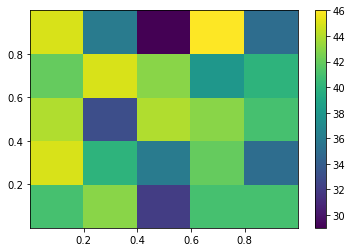

In [95]:
plt.hist2d(echX1000, echY1000, bins = 5)
plt.colorbar()

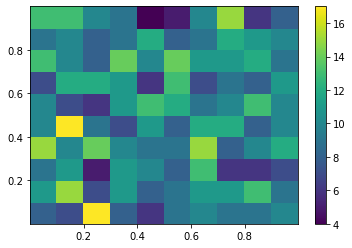

In [96]:
plt.hist2d(echX1000, echY1000, bins = 10)
plt.colorbar()

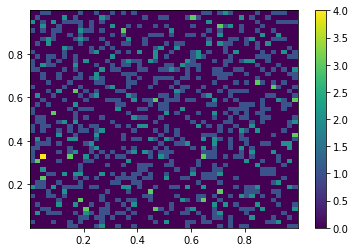

In [97]:
plt.hist2d(echX1000, echY1000, bins = 50)
plt.colorbar()

# 3 - Histogramme 2D et analyse géospatiale

<div class="alert alert-block alert-warning">
L'objectif de cette partie est de proposer une analyse plus fine de la répartition des lieux et des notes dans l'espace parisien que celle faite dans le précédent TME. Pour cela, nous allons discrétiser l'espace en une grille de cases selon un découpage linéaire de la latitude et de la longitude. Les cases de la grille peuvent être vu comme une variable qualitative d'indication géographique. Cette grille sera calculée par un histogramme en 2 dimensions.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour charger le tableau des données sur les points d'intérêt parisiens
</div>

In [98]:
# Chargement du fichier de données
tableau_poi = pd.read_csv("poi-paris.csv")

<div class="alert alert-block alert-info">
Q3.1.a - Définir une variable <code>bars</code> ne contenant que les lieux qui sont des bars, ne sont pas des restaurants et ont une note attribuée.
</div>

In [99]:
bars = tableau_poi[(tableau_poi['bar']==1)&(tableau_poi['restaurant']==0)&(tableau_poi['note']>0)]
bars

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
2992,Hôtel Abrial,48.890467,2.317608,3.4,-1,0,1,0,0,0,0,0,1,0,0,0,1
3034,Blanchisserie Bichat,48.872172,2.366913,3.0,-1,0,1,0,0,0,0,0,0,0,0,0,1
6988,La Pointe Lafayette,48.882322,2.368882,3.6,-1,0,0,0,1,0,0,0,0,0,0,0,1
6990,Café Odessa - Brasserie traditionnelle Montpar...,48.841565,2.324697,3.0,-1,0,0,0,1,0,0,0,0,0,0,0,1
7032,Le Fontenoy,48.868957,2.335845,3.7,-1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31840,Delice Dore Xuting,48.901548,2.388993,4.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31842,Le Fontenoy,48.846563,2.436680,4.2,-1,0,0,0,0,0,0,0,0,0,0,0,1
31844,Café Louis,48.891144,2.287485,4.3,-1,0,0,0,0,0,0,0,0,0,0,0,1
31846,Le Chalet Des Gaufres,48.842283,2.424079,3.4,-1,0,0,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-block alert-info">
Q3.1.b - Définir une variable <code>restos</code> ne contenant que les lieux qui sont des restaurants, ne sont pas des bars et ont une note attribuée.
</div>

In [100]:
restos = tableau_poi[(tableau_poi['restaurant']==1)&(tableau_poi['bar']==0)&(tableau_poi['note']>0)]
restos

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
827,Bulthaup,48.853836,2.326387,5.0,-1,1,0,0,0,1,0,0,0,0,0,1,0
871,Galeries Lafayette Gourmet,48.873103,2.330247,3.8,-1,1,0,0,0,1,0,0,0,0,0,1,0
1814,L'Atelier des Guillemites,48.858161,2.357276,3.9,-1,1,0,0,1,1,0,0,0,0,0,1,0
4291,Maison Pradier,48.875435,2.327027,3.7,-1,0,0,1,1,0,0,0,0,0,0,1,0
4296,Maison Pradier,48.890421,2.237496,2.4,-1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29341,L'Etoile du Liban,48.877568,2.338091,4.3,-1,0,0,0,0,0,0,0,0,0,0,1,0
29342,Crousti Poulet,48.873992,2.454176,4.4,-1,0,0,0,0,0,0,0,0,0,0,1,0
29343,Subway,48.899274,2.282634,3.7,-1,0,0,0,0,0,0,0,0,0,0,1,0
29345,Eden Pantin,48.896267,2.400696,4.0,-1,0,0,0,0,0,0,0,0,0,0,1,0


<div class="alert alert-block alert-info">
Q3.1.c - Définir une variable <code>barestos</code> ne contenant que les lieux qui sont à la fois des restaurants et des bars et ont une note attribuée.
</div>

In [101]:
barestos = tableau_poi[(tableau_poi['bar']==1)&(tableau_poi['restaurant']==1)&(tableau_poi['note']>0)]
barestos

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
938,ALLO CHR,48.876602,2.422864,3.8,-1,1,0,1,0,1,0,0,0,0,0,1,1
2018,La Chaise Et Le Vin,48.854505,2.364844,4.7,-1,1,0,0,0,1,0,0,0,0,0,1,1
4334,Café Pouchkine,48.869887,2.325498,3.7,-1,0,0,1,1,0,0,0,0,0,0,1,1
4677,CENTRAL PARC,48.812354,2.472908,4.1,-1,0,0,1,0,0,0,0,0,0,0,1,1
5038,Cuisine et Dépendances,48.869419,2.350863,4.5,-1,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,Sashimi,48.845953,2.343329,3.8,-1,0,0,0,0,0,0,0,0,0,0,1,1
31836,Le Saut du Crapaud,48.831568,2.324250,4.2,-1,0,0,0,0,0,0,0,0,0,0,1,1
31839,Ah! la Pompe à Biere,48.889289,2.376740,4.5,-1,0,0,0,0,0,0,0,0,0,0,1,1
31841,Au Métro,48.864419,2.368516,3.6,-1,0,0,0,0,0,0,0,0,0,0,1,1


<div class="alert alert-block alert-warning">
Comme nous allons utiliser différentes données (bars, restaurants) pour faire des histogrammes et que les limites spatiales (longitudes/latitudes maximales et minimales) ne sont pas forcément les mêmes entre chaque jeu de données, il est nécessaire dans un premier temps de définir ces limites et d'utiliser le paramètre `range` de la fonction ̀`hist2d` pour délimiter la région géographique étudiée en lui passant ces variables.
</div>

<div class="alert alert-block alert-info">
    Q3.2 - Enregistrer dans les variables <code>lomin, lomax, latmin, latmax</code> les longitudes et latitudes minimales/maximales des lieux du tableau <code>tableau_poi</code>.
</div>

In [102]:
lomin = np.min (tableau_poi['longitude'])
lomax = np.max (tableau_poi['longitude'])
latmin = np.min(tableau_poi['latitude'])
latmax = np.max(tableau_poi['latitude'])

<div class="alert alert-block alert-info">
Q3.3 - Tracer l'histogramme 2D de la répartition des bars en utilisant un nombre de segment de 20. Enregistrer le tableau résultant dans une variable <code>bars_h</code>.
    
Enregistrer également les bornes des longitudes et latitudes associées à l'histogramme dans les variables <code>long</code> et <code>lat</code>.
</div>

In [103]:
long = bars['longitude']
lat = bars['latitude']

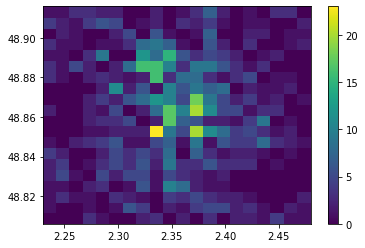

In [104]:
bars_h = plt.hist2d (long, lat, bins = 20)
plt.colorbar()

<div class="alert alert-block alert-info">
    Q3.4 - Le paramètre <code>weights</code> de la fonction <code>hist2d</code> permet de donner un poids à chaque lieu de l'échantillon passé en paramètre : le lieu ne comptera pas pour un dans le décompte, mais pour le poids associé. Il est ainsi possible de construire l'histogramme pondéré par la note de chaque lieu.

Enregistrer cet histogramme dans une variable `bars_n`.
</div>

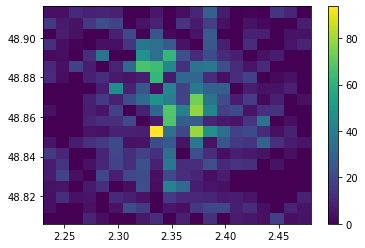

In [105]:
bars_n = plt.hist2d(long, lat , weights = bars['note'], bins = 20)
plt.colorbar()

<div class="alert alert-block alert-info">
En mettant en correspondance les deux histogrammes ainsi construits, on peut calculer la moyenne des notes dans chaque case, ce que fait la ligne suivante :
<div>

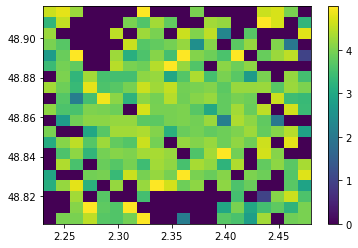

In [106]:
plt.imshow(bars_n[0]/(bars_h[0]+1e-6),origin='lower',extent=[lomin,lomax,latmin,latmax],aspect="auto")
_ = plt.colorbar()

<div class="alert alert-block alert-info">
Q3.5 - Faire le même travail sur les restaurants, en enregistrant le résultat dans les variables <code>restos_h</code> et <code>restos_n</code>. Voyez-vous une différence entre les bars et les restaurants ? Entre les différents lieux de Paris ?
</div>

In [107]:
long1 = restos['longitude']
lat1 = restos['latitude']

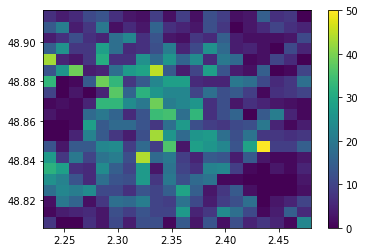

In [108]:
restos_h = plt.hist2d (long1, lat1, bins = 20)
plt.colorbar()

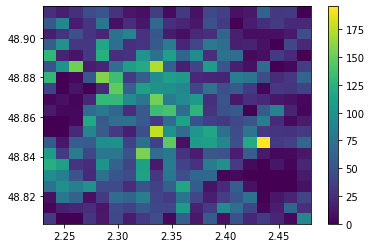

In [109]:
restos_n = plt.hist2d(long1, lat1 , weights = restos['note'], bins = 20)
plt.colorbar()

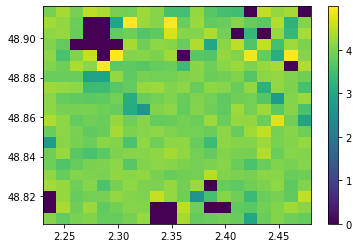

In [110]:
plt.imshow(restos_n[0]/(restos_h[0]+1e-6),origin='lower',extent=[lomin,lomax,latmin,latmax],aspect="auto")
_ = plt.colorbar()

<div class="alert alert-block alert-warning">
On obtient ainsi d'une part pour les restaurants, d'autre part pour les bars,  $20*20=400$ moyennes correspondant aux 400 régions découpées par l'histogramme et $400$ comptage du nombre de restaurants ou bars.
</div>

<div class="alert alert-block alert-info">
3.6 - Comparer les séries ainsi obtenues : le nombre moyen de bars par région est-il le même que celui de restaurants ? Qui à la plus grosse variance ? Tracer les boîtes à moustache correspondantes à l'aide de la fonction <code>np.ravel()</code> d'un tableau 2D qui  permet de transformer le tableau 2D en un tableau 1D. 

3.7 - Refaire le même travail avec un nombre de segments différents et comparer les résultats en fonction du nombre de segments. Quel est le problème pour les analyses sur les notes moyennes ?
</div>

C:\Users\thoma\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: operands could not be broadcast together with shapes (20,20) (21,) 

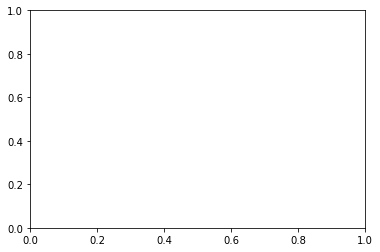

In [111]:
a = np.ravel(bars_n)
b = np.ravel(restos_n)
plt.boxplot((a, b), showmeans = True, labels = ['bars', 'restos'])

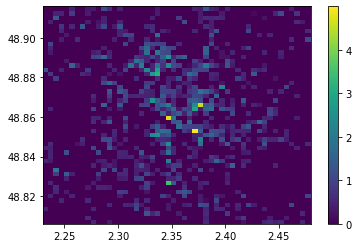

In [112]:
bars_h = plt.hist2d (long, lat, bins = 50)
bars_n = plt.hist2d(long, lat , weights = bars['note'], bins = 50)
plt.imshow(bars_n[0]/(bars_h[0]+1e-6),origin='lower',extent=[lomin,lomax,latmin,latmax],aspect="auto")
_ = plt.colorbar()

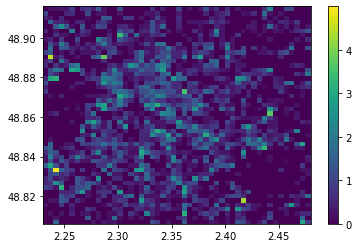

In [113]:
restos_h = plt.hist2d (long1, lat1, bins = 50)
restos_n = plt.hist2d(long1, lat1 , weights = restos['note'], bins = 50)
plt.imshow(restos_n[0]/(restos_h[0]+1e-6),origin='lower',extent=[lomin,lomax,latmin,latmax],aspect="auto")
_ = plt.colorbar()